<a id='Top'></a>
<h1> <center>Analytics Programming: Module 7</center> </h1>
<p><h2><center>Processing NYC Vehicle Crash Data & demoing Visualizations</center> 
<center>supported by a <a href="https://github.com/yuleidner/Katz_Data_Analytics/blob/master/M7/README.md">M7 README file </a></center></h2></p>
<center>Alan Leidner Oct 23, 2019</center>

## In this Notebook, I will attempt to perform an exploratoryanalysis of NYC's open dataset on Car Crashes. I willuse Use pandas to ingest and modify data, and then attemp a few diffternt kins of visualizations. 

### Links 
#### * Data: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95 
#### * Matplotlib Visualization of [Car crash fatalities in NYC over time](#Matplolib)
#### * Pandas Visualization of [Fatal Car Crash Causes](#Pandas_Visualiztion)
#### * Seaborn Visualization of [Plotting summed counts of fatalities over time by travel type](#Seaborn_Visualiztion)

### First I will pull up the data dictionary supplied by the OpenData website for reference.

In [39]:
import pandas as pd
data_dict = pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info')
data_dict

,Data Dictionary - Column Information,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes \n(where applicable, includes..."
1,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
2,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
3,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
4,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
5,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN
6,MV-Collisions - Crash,LATITUDE,Latitude coordinate for Global Coordinate Syst...,NaN,NaN
7,MV-Collisions - Crash,LONGITUDE,Longitude coordinate for Global Coordinate Sys...,NaN,NaN
8,MV-Collisions - Crash,LOCATION,"Latitude , Longitude pair",NaN,NaN
9,MV-Collisions - Crash,ON STREET NAME,Street on which the collision occurred,NaN,NaN


### Now I'll read in the actual data, pulling in all available rows

In [3]:
crashes = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=1600000")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### I'll take a quick peak at the `dataframe` I just created.

In [4]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590661 entries, 0 to 1590660
Data columns (total 29 columns):
date                             1590661 non-null object
time                             1590661 non-null object
borough                          1109021 non-null object
zip_code                         1108830 non-null object
latitude                         1395599 non-null float64
longitude                        1395599 non-null float64
location                         1395599 non-null object
on_street_name                   1279581 non-null object
off_street_name                  1060832 non-null object
cross_street_name                218915 non-null object
number_of_persons_injured        1590644 non-null float64
number_of_persons_killed         1590630 non-null float64
number_of_pedestrians_injured    1590661 non-null int64
number_of_pedestrians_killed     1590661 non-null int64
number_of_cyclist_injured        1590661 non-null int64
number_of_cyclist_killed        

In [5]:
crashes.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-10-20T00:00:00.000,0:00,MANHATTAN,10017,40.750774,-73.97655,POINT (-73.97655 40.750774),LEXINGTON AVENUE,EAST 41 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4226393,Taxi,Taxi,NaN,NaN,NaN
1,2019-10-20T00:00:00.000,14:50,NaN,NaN,NaN,NaN,NaN,BROOKLYN QUEENS EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4227678,Sedan,Sedan,NaN,NaN,NaN
2,2019-10-20T00:00:00.000,21:05,NaN,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE INNER ROADWA,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4226631,Sedan,NaN,NaN,NaN,NaN
3,2016-07-01T00:00:00.000,8:41,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3473629,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,2019-10-20T00:00:00.000,21:45,NaN,NaN,NaN,NaN,NaN,WEST 155 STREET,WEST STREET,NaN,...,NaN,NaN,NaN,NaN,4227195,NaN,NaN,NaN,NaN,NaN


### It looks like knly the first 29 columns from the data dictionary were imported. The rest must be in related datasets on the website.
### From the data I imported, I will try to create

#### * An exploratoy vizualization of [fatal crash frequency over time](#Matplolib)
#### * An exploratoy vizualization of [contributing factors to crash fatalities](#Pandas_Visualiztion)
#### * An exploratoy vizualization of [fatalities to pedestrians vs cyclists vs motorist](#Seaborn_Visualiztion)

#### First, I'll need to clean up the data. I'll start by converting the date and time columns to datetime using the `to_datetime` pandas function

In [6]:
type(crashes['date'])

pandas.core.series.Series

In [7]:
crashes['date'] = pd.to_datetime(crashes['date'])
type(crashes['date'])

pandas.core.series.Series

#### IT LOOKS LIKE THAT DID NOTHING?!
#### Upon further investigation, it looks like dataframe columns will always be a series object. whta I need to look at is dtype, not type

In [8]:
crashes['date'].dt

#### Good to go.
#### Next I'll look at a few of the contributing factor attributes to get a sense of the data using the `unique` function

In [9]:
crashes['contributing_factor_vehicle_1'].unique()

array(['Driver Inattention/Distraction', 'Unspecified',
       'Passing Too Closely', nan, 'Following Too Closely',
       'Unsafe Lane Changing', 'Fell Asleep',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Passing or Lane Usage Improper', 'Reaction to Uninvolved Vehicle',
       'Turning Improperly', 'Alcohol Involvement', 'Unsafe Speed',
       'Backing Unsafely', 'Failure to Yield Right-of-Way',
       'Traffic Control Disregarded', 'View Obstructed/Limited',
       'Other Vehicular', 'Driver Inexperience',
       'Outside Car Distraction', 'Passenger Distraction', 'Glare',
       'Animals Action', 'Oversized Vehicle', 'Brakes Defective',
       'Tire Failure/Inadequate', 'Pavement Slippery', 'Steering Failure',
       'Physical Disability', 'Illnes', 'Aggressive Driving/Road Rage',
       'Obstruction/Debris', 'Drugs (illegal)', 'Pavement Defective',
       'Fatigued/Drowsy', 'Other Electronic Device',
       'Failure to Keep Right', 'Vehicle Vandalism',


#### Using the `unique` function on the `df` column gave me good insight into the recorded contributing factor values, but I'd like to get a better sense of how populated each of the 5 columns actually look, or if there are trends I should look at.
#### Next I'll use the `value_counts` function to see how frequently these values appear in the data.

In [10]:
crashes['contributing_factor_vehicle_1'].value_counts()

Unspecified                                              586785
Driver Inattention/Distraction                           294720
Failure to Yield Right-of-Way                             90150
Following Too Closely                                     78557
Backing Unsafely                                          60792
Other Vehicular                                           50606
Fatigued/Drowsy                                           46841
Turning Improperly                                        40745
Passing or Lane Usage Improper                            37061
Passing Too Closely                                       33947
Unsafe Lane Changing                                      30130
Traffic Control Disregarded                               24252
Driver Inexperience                                       23360
Lost Consciousness                                        19611
Pavement Slippery                                         15742
Prescription Medication                 

In [11]:
crashes['contributing_factor_vehicle_2'].value_counts()

Unspecified                                              1157806
Driver Inattention/Distraction                             72301
Other Vehicular                                            26558
Failure to Yield Right-of-Way                              13852
Following Too Closely                                      13317
Fatigued/Drowsy                                            10823
Passing or Lane Usage Improper                              9237
Turning Improperly                                          7675
Backing Unsafely                                            6961
Passing Too Closely                                         6481
Driver Inexperience                                         5423
Traffic Control Disregarded                                 5248
Lost Consciousness                                          5223
Unsafe Lane Changing                                        5197
Pavement Slippery                                           3460
Prescription Medication  

In [12]:
crashes['contributing_factor_vehicle_3'].value_counts()

Unspecified                                              95608
Other Vehicular                                           1897
Driver Inattention/Distraction                            1362
Following Too Closely                                     1243
Fatigued/Drowsy                                            853
Pavement Slippery                                          290
Outside Car Distraction                                    147
Driver Inexperience                                        143
Reaction to Uninvolved Vehicle                             143
Traffic Control Disregarded                                137
Failure to Yield Right-of-Way                              120
Backing Unsafely                                            86
Alcohol Involvement                                         76
Passing or Lane Usage Improper                              75
Unsafe Speed                                                75
Turning Improperly                                     

In [13]:
crashes['contributing_factor_vehicle_4'].value_counts()

Unspecified                                    20154
Other Vehicular                                  352
Following Too Closely                            227
Fatigued/Drowsy                                  170
Driver Inattention/Distraction                   166
Pavement Slippery                                 74
Reaction to Uninvolved Vehicle                    26
Traffic Control Disregarded                       21
Driver Inexperience                               20
Outside Car Distraction                           20
Fell Asleep                                       18
Unsafe Speed                                      17
Failure to Yield Right-of-Way                     15
Obstruction/Debris                                15
Alcohol Involvement                               14
Other Electronic Device                            9
Backing Unsafely                                   8
Passing or Lane Usage Improper                     7
Failure to Keep Right                         

In [14]:
crashes['contributing_factor_vehicle_5'].value_counts()

Unspecified                                    5158
Other Vehicular                                  90
Following Too Closely                            48
Fatigued/Drowsy                                  41
Driver Inattention/Distraction                   39
Pavement Slippery                                29
Reaction to Uninvolved Vehicle                    9
Alcohol Involvement                               8
Driver Inexperience                               8
Obstruction/Debris                                5
Failure to Yield Right-of-Way                     4
Fell Asleep                                       3
Outside Car Distraction                           3
Traffic Control Disregarded                       3
Unsafe Speed                                      2
Failure to Keep Right                             2
Other Electronic Device                           2
Drugs (illegal)                                   2
Passing or Lane Usage Improper                    1
Steering Fai

#### It looks like the first contributing factor column is the data field that is used primarily. The 2nd field contains data about 5% of the time, the rest even less than that. For now, I'll just analyze the 1st contributing factor, to get a general sense.
#### The values are hard to get a sense of in this chart though. Lets see if we can get a visualiztion out of it using `matplotlib`.

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


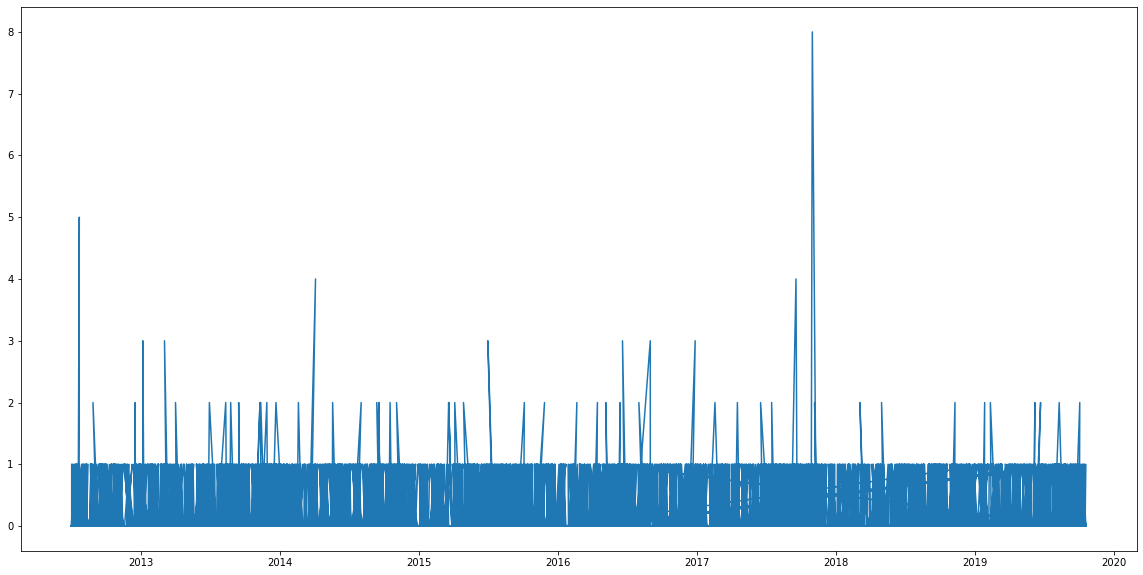

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data

x = crashes['date']
y = crashes['number_of_persons_killed']

ax.plot(x,y)

#### GACK?! That was terrible. Our data is not ready to be turned into a graph yet.
#### I need to refine my `dataframe`. I'll try to sort rows where fatalities occured into a new dataframe,  then I need to group by date and sum

In [40]:
lethal_crashes = crashes[crashes['number_of_persons_killed'] > 0]
lethal_crashes.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
426,2016-05-22,20:12,NaN,NaN,40.888992,-73.889200,POINT (-73.8892 40.888992),Major Deegan Expy,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3445289,MOTORCYCLE,PASSENGER VEHICLE,NaN,NaN,NaN
455,2019-08-29,2:35,NaN,NaN,40.834890,-73.866300,POINT (-73.8663 40.83489),CROSS BRONX EXPY,NaN,NaN,...,NaN,NaN,NaN,NaN,4196472,Dump,NaN,NaN,NaN,NaN
590,2016-05-08,2:34,QUEENS,11420,40.679794,-73.809820,POINT (-73.80982 40.679794),115 AVENUE,131 STREET,NaN,...,NaN,NaN,NaN,NaN,3436840,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
699,2019-08-04,4:01,NaN,NaN,NaN,NaN,NaN,SOUTH CONDUIT AVENUE,LINDEN BOULEVARD,NaN,...,NaN,NaN,NaN,NaN,4182741,Sedan,NaN,NaN,NaN,NaN
1399,2019-09-22,4:08,NaN,NaN,40.830223,-73.834045,POINT (-73.834045 40.830223),BRUCKNER BOULEVARD,NaN,NaN,...,NaN,NaN,NaN,NaN,4210962,Motorcycle,NaN,NaN,NaN,NaN


#### It's hard to see number of persons killed while peeking. It might be a bit unnecesary, but I'll rearange the columns!

In [41]:
lethal_crashes = lethal_crashes[["date",
                                 "time",
                                 "number_of_persons_killed",
                                 'borough',
                                 'zip_code',
                                 'latitude',
                                 'longitude',
                                 'location',
                                 'on_street_name',
                                 'off_street_name',
                                 'cross_street_name',
                                 'number_of_persons_injured',
                                 'number_of_pedestrians_injured',
                                 'number_of_pedestrians_killed',
                                 'number_of_cyclist_injured',
                                 'number_of_cyclist_killed',
                                 'number_of_motorist_injured',
                                 'number_of_motorist_killed',
                                 'contributing_factor_vehicle_1',
                                 'contributing_factor_vehicle_2',
                                 'contributing_factor_vehicle_3',
                                 'contributing_factor_vehicle_4',
                                 'contributing_factor_vehicle_5',
                                 'unique_key',
                                 'vehicle_type_code1',
                                 'vehicle_type_code2',
                                 'vehicle_type_code_3',
                                 'vehicle_type_code_4',           
                                 'vehicle_type_code_5']]
lethal_crashes.head()

,date,time,number_of_persons_killed,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
426,2016-05-22,20:12,1.0,NaN,NaN,40.888992,-73.889200,POINT (-73.8892 40.888992),Major Deegan Expy,NaN,...,Unspecified,NaN,NaN,NaN,3445289,MOTORCYCLE,PASSENGER VEHICLE,NaN,NaN,NaN
455,2019-08-29,2:35,1.0,NaN,NaN,40.834890,-73.866300,POINT (-73.8663 40.83489),CROSS BRONX EXPY,NaN,...,NaN,NaN,NaN,NaN,4196472,Dump,NaN,NaN,NaN,NaN
590,2016-05-08,2:34,1.0,QUEENS,11420,40.679794,-73.809820,POINT (-73.80982 40.679794),115 AVENUE,131 STREET,...,NaN,NaN,NaN,NaN,3436840,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
699,2019-08-04,4:01,1.0,NaN,NaN,NaN,NaN,NaN,SOUTH CONDUIT AVENUE,LINDEN BOULEVARD,...,NaN,NaN,NaN,NaN,4182741,Sedan,NaN,NaN,NaN,NaN
1399,2019-09-22,4:08,1.0,NaN,NaN,40.830223,-73.834045,POINT (-73.834045 40.830223),BRUCKNER BOULEVARD,NaN,...,NaN,NaN,NaN,NaN,4210962,Motorcycle,NaN,NaN,NaN,NaN


#### Much better, and we can easily peek at the data!
#### Now to group by Date. I'm going to use a number of chained functions here, but all you need to know is that I am adding up the number of fatalities per day, and sorting cronologically.

In [20]:
crashes.groupby('date').number_of_persons_killed.sum().reset_index()

,date,number_of_persons_killed
0,2012-07-01,0.0
1,2012-07-02,1.0
2,2012-07-03,1.0
3,2012-07-04,0.0
4,2012-07-05,1.0
5,2012-07-06,0.0
6,2012-07-07,0.0
7,2012-07-08,1.0
8,2012-07-09,0.0
9,2012-07-10,1.0


#### hmmm.... now that I got this far, I bet I didnt need to sort out the data which was lethal first.... though it might save on processing speed? 
#### I'll port this into a new dataframe with some other fields I'm interested in for analysis, then try to use matplotlib again.

In [21]:
counted_lethal_crashes = crashes.groupby(['date','borough', 'contributing_factor_vehicle_1']).number_of_persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192843 entries, 0 to 192842
Data columns (total 4 columns):
date                             192843 non-null datetime64[ns]
borough                          192843 non-null object
contributing_factor_vehicle_1    192843 non-null object
number_of_persons_killed         192843 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.9+ MB


#### Hopefully we can now visualize it!!! <a id='Matplolib'></a>

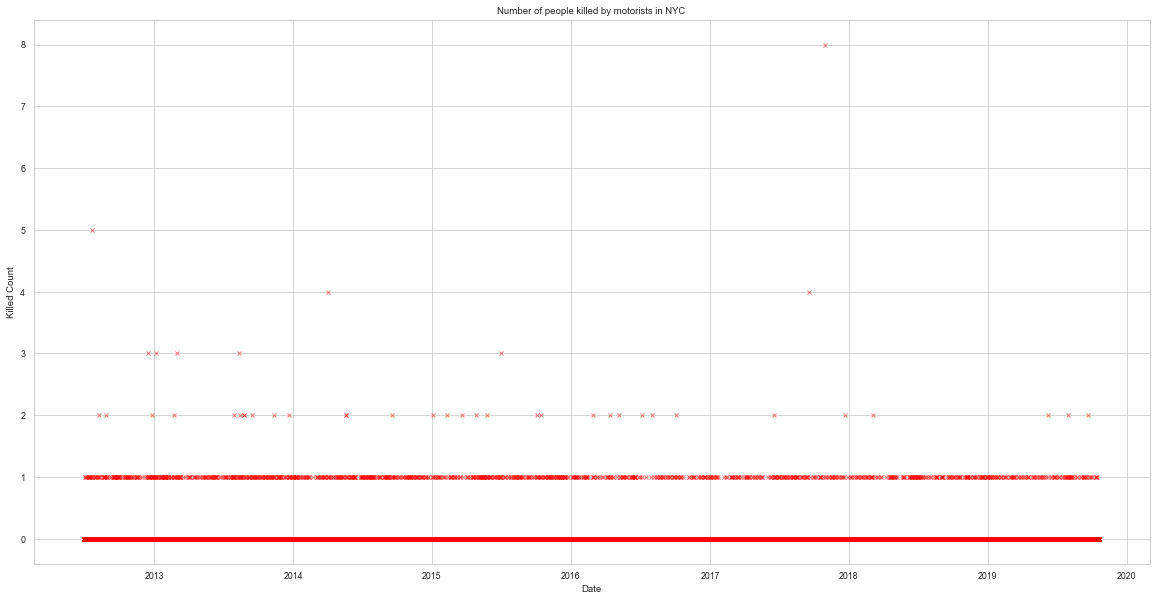

In [43]:
fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

x = counted_lethal_crashes['date']
y = counted_lethal_crashes['number_of_persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC")

plt.show()

### We have succesfully plotted the *Car crash fatalities in NYC over time*!

### We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.  

#### Next we'll look into the causes of fatal car crashes. We'll start by creating a new `dataframe` that groups those causes.

In [23]:
counted_lethal_crash_factors = crashes.groupby('contributing_factor_vehicle_1').number_of_persons_killed.sum().reset_index().sort_values("number_of_persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,number_of_persons_killed
56,Unspecified,674.0
11,Driver Inattention/Distraction,219.0
52,Traffic Control Disregarded,172.0
18,Failure to Yield Right-of-Way,172.0
55,Unsafe Speed,142.0


#### Now we'll try to plot this on a bar chart using Pandas's ploting functions.

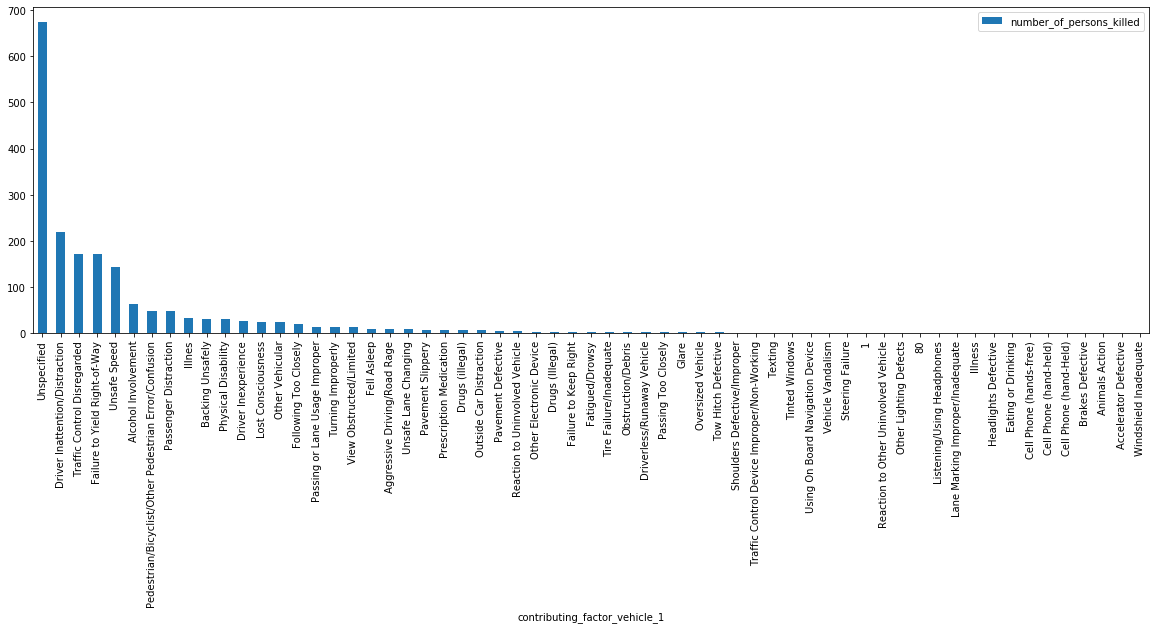

In [24]:
counted_lethal_crash_factors.plot.bar("contributing_factor_vehicle_1", 
             "number_of_persons_killed",
             figsize = (20,6)
            )

#### This is ok, but hard to tell if the tail ends contain values. Also, hard to read. Lets drop 0's and flip axes.
#### First we'll make sure its actually 0.

In [25]:
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,number_of_persons_killed
8,Cell Phone (hand-Held),0.0
7,Brakes Defective,0.0
5,Animals Action,0.0
2,Accelerator Defective,0.0
60,Windshield Inadequate,0.0


#### Bad data! Bad!
#### We'll remove those zero values now.

In [26]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.number_of_persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,number_of_persons_killed
13,Driverless/Runaway Vehicle,2.0
36,Passing Too Closely,2.0
22,Glare,2.0
34,Oversized Vehicle,1.0
50,Tow Hitch Defective,1.0


## And now to Visualize Fatal Car Crash Causes in NYC <a id='Pandas_Visualiztion'></a>

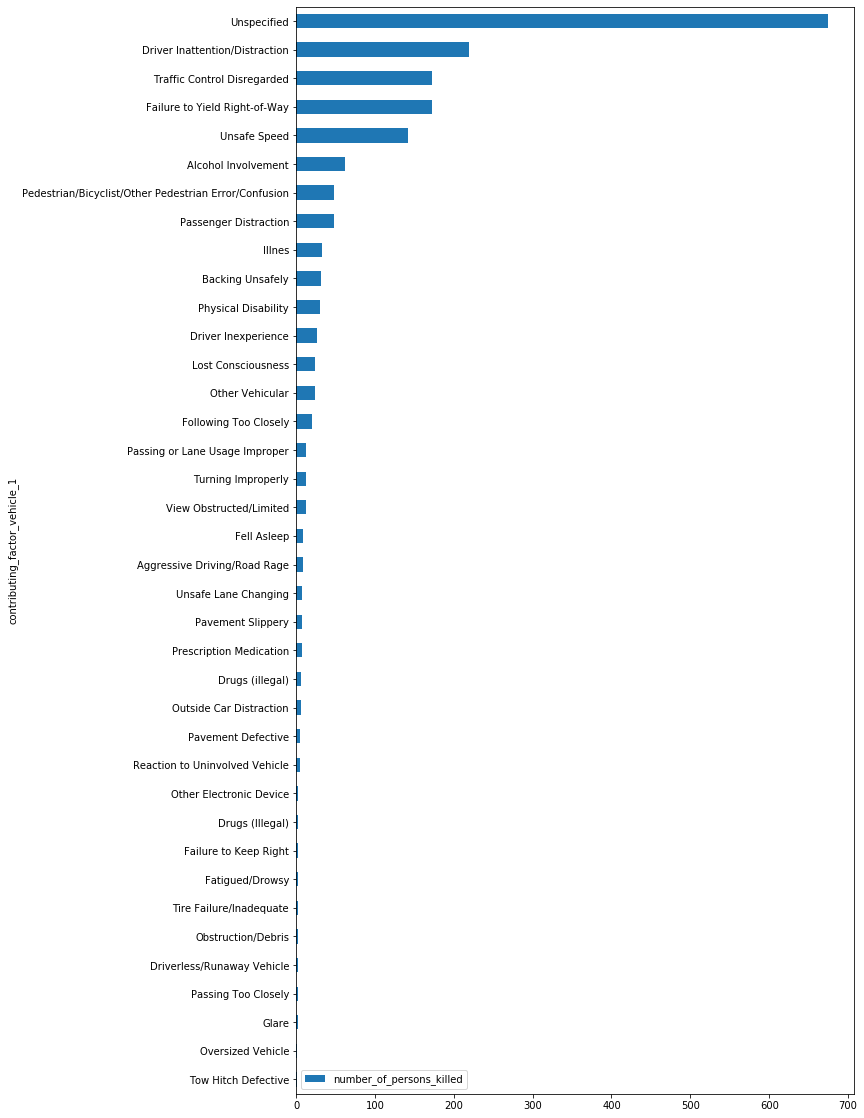

In [27]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "number_of_persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

### This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by driver's bad behaviours, or are unrecorded. 
### This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. 
### However, if NYC's government wanted to do more to reduce fatalities, this is useful information.

### Although this information is significantly more usable than our first visualization, it still doesn't look very nice.
### This is in part due to time constraints.  My allocated time went to heavily data munging instead of optimizing visualizations. There is much room for improvement here on version 2. I could only provide the tope 10 values, use clearer labels, assign internal vs external causes different colors to layer additional dimensions to the depth.... next time.
## We'll switch to Seaborn for the rest of our work, which allows for greater range and easier user controls.

### For this we'll compare the distributions of fatalities by the category of person killed. I'll group each category from our original dataframe into it's own dataframe.
### I will then add a column to each dataframe which creates a running total of persons killed, using the `cumsum` function.

In [28]:
killed_motorists = crashes.groupby('date').number_of_motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['number_of_motorist_killed'].cumsum()

killed_cyclist = crashes.groupby('date').number_of_cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['number_of_cyclist_killed'].cumsum()

killed_pedestrians = crashes.groupby('date').number_of_pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['number_of_pedestrians_killed'].cumsum()

<a id='Seaborn_Visualiztion'></a>
## Now we can plot these using `Seaborn` a library built to handle python data visualizations
### For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger

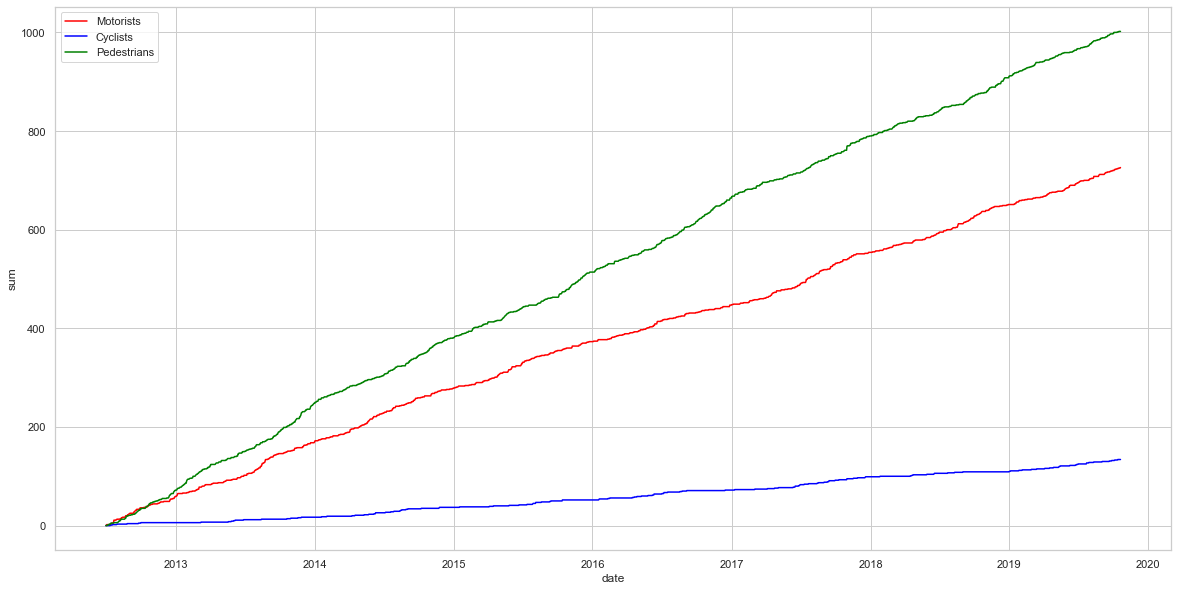

In [29]:
import seaborn as sns
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

## This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening. 
### This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.
### Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.
#### Below you will find another few attempts at data munging which did not bear fruits in my analysis above, but may be helpful in the future.

#### Here I attempted to merge all my dataframes with the `cumsum` totals. This will eb useful for analysis, but not for my graphs above.

In [30]:
killed_by_category = pd.merge(left=killed_motorists,right=killed_cyclist, how='outer', left_on='date', right_on='date')
killed_by_category = pd.merge(left=killed_by_category,right=killed_pedestrians, how='outer', left_on='date', right_on='date')
killed_by_category.head()

,date,number_of_motorist_killed,sum_x,number_of_cyclist_killed,sum_y,number_of_pedestrians_killed,sum
0,2012-07-01,0,0,0,0,0,0
1,2012-07-02,1,1,0,0,0,0
2,2012-07-03,1,2,0,0,0,0
3,2012-07-04,0,2,0,0,0,0
4,2012-07-05,0,2,0,0,1,1


#### Here I attempted to merge datasets for persons injured vs persons killed. This lead to a graph which skewed toward a greater number of person injured than killed.
#### Although that is what I expected, I did not perform any data validation on the work.

In [31]:
injured_persons = crashes.groupby('date').number_of_persons_injured.sum().reset_index()
killed_persons = crashes.groupby('date').number_of_persons_killed.sum().reset_index()
killed_vs_injured = pd.merge(left=injured_persons,right=killed_persons, how='outer', left_on='date', right_on='date')
killed_vs_injured.describe()

,number_of_persons_injured,number_of_persons_killed
count,2668.000000,2668.000000
mean,156.395052,0.696402
std,32.233305,0.911141
min,21.000000,0.000000
25%,135.000000,0.000000
50%,156.000000,0.000000
75%,177.000000,1.000000
max,311.000000,10.000000


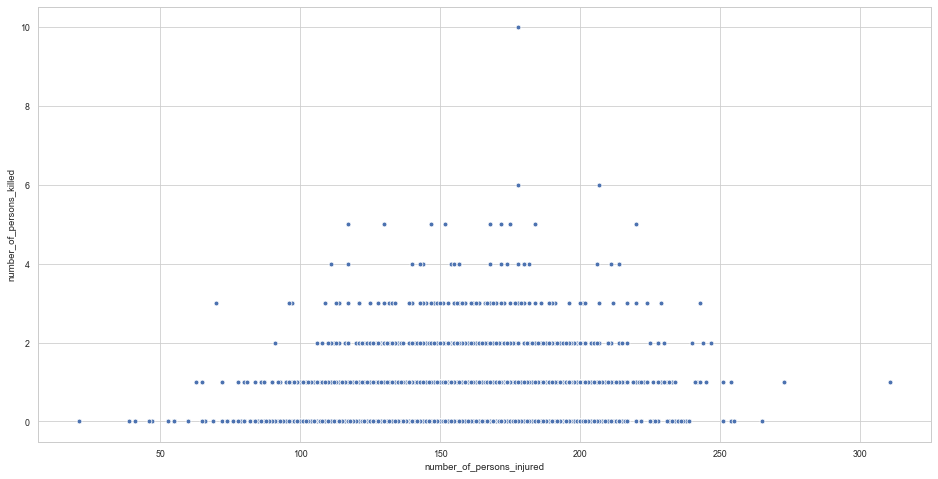

In [42]:
sns.set() # switches to seaborn defaults
sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(16, 8))

sns.scatterplot(x="number_of_persons_injured", y="number_of_persons_killed", data=killed_vs_injured)

# <center> <br>[Begining of the page](#Top)</center>